# Topics in Artificial Intelligence (CPSC 532L)
# Assignment 1: Intriduction to Deep Learning


This assignment is inspired and adopted from the Deep Learning Lab from Vicente Ordonez's course on Language and Vision at the University of Virginia. The link to the original lab is <a href="http://www.cs.virginia.edu/~vicente/vislang/notebooks/deep_learning_lab.html">here</a>. The first two parts of this notebook are taken nearly verbatim from his lab. Section 1 is provided for you and implements a single-layer supervised neural network; no coding is required for Section 1. Section 2 and Section 3 are the ones where you need to code the solutions and provide answers to questions.

# 1. Single-layer neural network
This section provides simple implementation of the single-layer supervised neural network that has 4 inputs and 3 outputs. First, let's review the skeleton of a single linear layer neural network. The inputs of the network are the variables $x_1, x_2, x_3, x_4$, or the input vector $\mathbf{x}=[x_1, x_2, x_3, x_4]$, the outputs of the network are $\widehat{y}_1,\widehat{y}_2,\widehat{y}_3$, or the output vector $\widehat{\mathbf{y}}=[$$\widehat{y}$$_1,\widehat{y}_2,\widehat{y}_3]$:

<img src="1_layer_net.png" width="450"/>

The given $j$-th output $\widehat{y}_j$ of this single linear layer + activation function is computed as follows:

$$\widehat{y}_j= \text{sigmoid}(w_{1j}x_1 + w_{2j}x_2 + w_{3j}x_3 + w_{4j}x_4 + b_j) = \text{sigmoid}\Big(\sum_{i=1}^{i=4}w_{ij}x_{i} + b_j\Big)$$

In matrix notation, this would be: 

\begin{equation}
\begin{bmatrix}
  \widehat{y}_{1} \\ 
  \widehat{y}_{2} \\
  \widehat{y}_{3} 
\end{bmatrix}^T=\mathbf{Sigmoid}\Bigg(
\begin{bmatrix}
  x_{1} \\
  x_{2} \\
  x_{3} \\
  x_{4}
\end{bmatrix}^T
\begin{bmatrix}
  w_{1,1} & w_{1,2} & w_{1,3}\\
  w_{2,1} & w_{3,2} & w_{2,3}\\
  w_{3,1} & w_{3,2} & w_{3,3}\\
  w_{4,1} & w_{4,2} & w_{4,3}
\end{bmatrix}
+
\begin{bmatrix}
  b_{1} \\
  b_{2} \\
  b_{3}
\end{bmatrix}^T\Bigg)
\end{equation}

or more compactly:

\begin{equation}
\widehat{\mathbf{y}}^T = \mathbf{Sigmoid}(\mathbf{x}^T \cdot \mathbf{W} + \mathbf{b}^T)
\end{equation}

The element-wise sigmoid function is: $\mathbf{Sigmoid}(\mathbf{x}) = 1 \;/\; (1 + exp(-\mathbf{x}))$, or alternatively: $\mathbf{Sigmoid}(\mathbf{x}) = exp(\mathbf{x})\;/\;(1 + exp(\mathbf{x}))$. Here the sigmoid is separated logically into an activation layer $\sigma(x)$ and a linear layer $\text{linear}(3,4)$ as illustrated in figure. 

Training these weights $\mathbf{W}$ and biases $\mathbf{b}$ requires having many training pairs $(\widehat{\mathbf{y}}^{(m)}, \mathbf{x}^{(m)})$. The inputs $\mathbf{x}$ can be the pixels of an image, indices of words, the entries in a database, and the outputs $\widehat{\mathbf{y}}$ can also be literally anything, including a number indicating a category, a set of numbers indicating the indices of words composing a sentence, an output image itself, etc.

## 1.1. Forward-propagation

Computing the outputs $\widehat{\mathbf{y}}$ from the inputs $\mathbf{x}$ in this network composed of a single linear layer, and a sigmoid layer, is called forward-propagation. Below is the code that implements these two operations:

In [1]:
import numpy as np
import numpy.matlib

class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.001
        self.bias = np.matlib.randn((1, output_dim)) * 0.001
        
    # y = Wx + b
    def forward(self, x):
        return np.dot(x, self.weight) + self.bias
    
    def getParameters(self):
        return [self.weight, self.bias]

# Let's test the composition of the two functions (forward-propagation in the neural network).
x1 = np.array([[1, 2, 2, 3]])
y_hat1 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x1))
print('x[1] = '+ str(x1))
print('y_hat[1] = ' + str(y_hat1) + '\n')

# Let's test the composition of the two functions (forward-propagation in the neural network).
x2 = np.array([[4, 5, 2, 1]])
y_hat2 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x2))
print('x[2] = '+ str(x2))
print('y_hat[2] = ' + str(y_hat2) + '\n')

# We can also compute both at once, which could be more efficient since it requires a single matrix multiplication.
x = np.concatenate((x1, x2), axis = 0)
y_hat = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x))
print('x = ' + str(x))
print('y_hat = ' + str(y_hat))

x[1] = [[1 2 2 3]]
y_hat[1] = [[0.5014899  0.50094746 0.50008843]]

x[2] = [[4 5 2 1]]
y_hat[2] = [[0.49864907 0.50128578 0.49790607]]

x = [[1 2 2 3]
 [4 5 2 1]]
y_hat = [[0.49964546 0.49934083 0.49900269]
 [0.49853866 0.49866102 0.4988418 ]]


## 1.2. Loss functions.

After computing the output predictions $\widehat{\mathbf{y}}$ it is necessary to compare these against the true values of $\mathbf{y}$. Let's call these true, correct, or desired values $\mathbf{y}$. Typically, a simple loss or cost function is used to measure the degree by which the prediction $\widehat{\mathbf{y}}$ is wrong with respect to $\mathbf{y}$. A common loss function for regression is the sum of squared differences between the prediction and its true value. Assuming a prediction $\widehat{\mathbf{y}}^{(d)}$ for our training sample $\mathbf{x}^{(d)}$ with true value $\mathbf{y}^{(d)}$, then the loss can be computed as:

$$loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)}) = (\widehat{y}^{(d)}_1 - y^{(d)}_1)^2 + (\widehat{y}^{(d)}_2 - y^{(d)}_2)^2 + (\widehat{y}^{(d)}_3 - y^{(d)}_3)^2 = \sum_{j=1}^{j=3}(\widehat{y}^{(d)}_j - y^{(d)}_j)^2$$

The goal is to modify the parameters [$\mathbf{W}, \mathbf{b}$] in the Linear layer so that the value of $loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$ becomes as small as possible for all training samples in a set $D=\{(\mathbf{x}^{(d)},\mathbf{y}^{(d)})\}$. This would in turn ensure that predictions $\widehat{\mathbf{y}}$ are as similar as possible to the true values $\mathbf{y}$. To achieve this we need to minimize the following function:

$$\mathcal{L}(\mathbf{W}, \mathbf{b}) = \sum_{d=1}^{d=|D|} loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$$

The only two variables for our model in the function $\mathcal{L}(\mathbf{W}, \mathbf{b})$ are $\mathbf{W}$ and $\mathbf{b}$, this is because the training dataset $D$ is fixed. Finding the values of $\mathbf{W}$ and $\mathbf{b}$ that minimize the the loss, particularly for complex functions, is typically done using gradient based optimization, like Stochastic Gradient Descent (SGD). 

In [2]:
class nn_MSECriterion:  # MSE = mean squared error.
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))

# Let's test the loss function.
y_hat = np.array([[0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33]])
y_true = np.array([[0.25, 0.25, 0.25], [0.33, 0.33, 0.33], [0.77, 0.77, 0.77], [0.80, 0.80, 0.80]])

nn_MSECriterion().forward(y_hat, y_true)

1.6271000000000002


## 1.3. Backward-propagation (Backpropagation)

As we discussed in class, backpropagation is just applying the chain-rule in calculus to compute the derivative of a function which is the composition of many functions (this is essentially definition of the neural network). 

Below is the implementation of required derivative computations for our simple network. You are highly advised to derive the derivatives implemented here to make sure you understand how one arrives at them. 

In [3]:
# This is referred above as f(u).
class nn_MSECriterion:
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))
        
    def backward(self, predictions, labels):
        num_samples = labels.shape[0]
        return num_samples * 2 * (predictions - labels)

# This is referred above as g(v).
class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    
    def backward(self, x, gradOutput):
        # It is usually a good idea to use gv from the forward pass and not recompute it again here.
        gv = 1 / (1 + np.exp(-x))  
        return np.multiply(np.multiply(gv, (1 - gv)), gradOutput)

# This is referred above as h(W, b)
class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.01
        self.bias = np.matlib.randn((1, output_dim)) * 0.01
        self.gradWeight = np.zeros_like(self.weight)
        self.gradBias = np.zeros_like(self.bias)
        
    def forward(self, x):
        return np.dot(x, self.weight) + self.bias
    
    def backward(self, x, gradOutput):
        # dL/dw = dh/dw * dL/dv
        self.gradWeight = np.dot(x.T, gradOutput)
        # dL/db = dh/db * dL/dv
        self.gradBias = np.copy(gradOutput)
        # return dL/dx = dh/dx * dL/dv
        return np.dot(gradOutput, self.weight.T)
    
    def getParameters(self):
        params = [self.weight, self.bias]
        gradParams = [self.gradWeight, self.gradBias]
        return params, gradParams
    

# Let's test some dummy inputs for a full pass of forward and backward propagation.
x1 = np.array([[1, 2, 2, 3]])
y1 = np.array([[0.25, 0.25, 0.25]])

# Define the operations.
linear = nn_Linear(4, 3)  # h(W, b)
sigmoid = nn_Sigmoid()  # g(v)
loss = nn_MSECriterion()  # f(u)

# Forward-propagation.
lin = linear.forward(x1)
y_hat = sigmoid.forward(lin)
loss_val = loss.forward(y_hat, y1) # Loss function.

# Backward-propagation.
dy_hat = loss.backward(y_hat, y1)
dlin = sigmoid.backward(lin, dy_hat)
dx1 = linear.backward(x1, dlin)

print('\n num_samples = ' + str(y1.shape[0]))

# Show parameters of the linear layer.
print('\nW = ' + str(linear.weight))
print('B = ' + str(linear.bias))

# Show the intermediate outputs in the forward pass.
print('\nx1    = '+ str(x1))
print('lin   = ' + str(lin))
print('y_hat = ' + str(y_hat))

print('\nloss = ' + str(loss_val))

# Show the intermediate gradients with respect to inputs in the backward pass.
print('\ndy_hat = ' + str(dy_hat))
print('dlin   = ' + str(dlin))
print('dx1    = ' + str(dx1))

# Show the gradients with respect to parameters.
print('\ndW = ' + str(linear.gradWeight))
print('dB = ' + str(linear.gradBias))


 num_samples = 1

W = [[ 0.00288783  0.00592101 -0.00742156]
 [-0.01582563  0.01499748  0.00518323]
 [ 0.00377212 -0.00223538 -0.00465185]
 [-0.00498538  0.01386958 -0.00671271]]
B = [[-0.01530186  0.00500013 -0.00250849]]

x1    = [[1 2 2 3]]
lin   = [[-0.05147719  0.07805408 -0.02900542]]
y_hat = [[0.48713354 0.51950362 0.49274915]]

loss = 0.1877916706814927

dy_hat = [[0.47426709 0.53900724 0.48549831]]
dlin   = [[0.11848826 0.13454678 0.12134905]]
dx1    = [[ 0.00023823  0.00077169 -0.00041831  0.00046082]]

dW = [[0.11848826 0.13454678 0.12134905]
 [0.23697652 0.26909355 0.2426981 ]
 [0.23697652 0.26909355 0.2426981 ]
 [0.35546478 0.40364033 0.36404716]]
dB = [[0.11848826 0.13454678 0.12134905]]


## 1.4. Gradient checking 

The gradients can also be computed with numerical approximation using the definition of derivatives. Let a single input pair $(\mathbf{x}, \mathbf{y})$ be the input, for each entry $w_{ij}$ in the weight matrix $\mathbf{W}$, the partial derivatives can be computed as follows:

$$\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}} = \frac{\mathcal{L}(\mathbf{W} + \mathbf{E}_{ij},b) - \mathcal{L}(\mathbf{W} - \mathbf{E}_{ij}, b)}{2\epsilon}, $$

where $\mathbf{E}_{ij}$ is a matrix that has $\epsilon$ in its $(i,j)$ entry and zeros everywhere else. Intuitively this gradient tells how would the value of the loss changes if we change a particular weight $w_{ij}$ by an $\epsilon$ amount. We can do the same to compute derivatives with respect to the bias parameters $b_i$. Below is the code that checks for a given input $(\mathbf{x}, \mathbf{y})$, the gradients for the matrix $\mathbf{W}$. 

In [4]:
# We will compute derivatives with respect to a single data pair (x,y)
x = np.array([[2.34, 3.8, 34.44, 5.33]])
y = np.array([[3.2, 4.2, 5.3]])

# Define the operations.
linear = nn_Linear(4, 3)
sigmoid = nn_Sigmoid()
criterion = nn_MSECriterion()

# Forward-propagation.
a0 = linear.forward(x)
a1 = sigmoid.forward(a0)
loss = criterion.forward(a1, y) # Loss function.

# Backward-propagation.
da1 = criterion.backward(a1, y)
da0 = sigmoid.backward(a0, da1)
dx = linear.backward(x, da0)

gradWeight = linear.gradWeight
gradBias = linear.gradBias

approxGradWeight = np.zeros_like(linear.weight)
approxGradBias = np.zeros_like(linear.bias)

# We will verify here that gradWeights are correct and leave it as an excercise
# to verify the gradBias.
epsilon = 0.0001
for i in range(0, linear.weight.shape[0]):
    for j in range(0, linear.weight.shape[1]):
        # Compute f(w)
        fw = criterion.forward(sigmoid.forward(linear.forward(x)), y) # Loss function.
        # Compute f(w + eps)
        shifted_weight = np.copy(linear.weight)
        shifted_weight[i, j] = shifted_weight[i, j] + epsilon
        shifted_linear = nn_Linear(4, 3)
        shifted_linear.bias = linear.bias
        shifted_linear.weight = shifted_weight
        fw_epsilon = criterion.forward(sigmoid.forward(shifted_linear.forward(x)), y) # Loss function
        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight[i, j] = (fw_epsilon - fw) / epsilon

# These two outputs should be similar up to some precision.
print('gradWeight: ' + str(gradWeight))
print('\napproxGradWeight: ' + str(approxGradWeight))

gradWeight: [[ -2.78858362  -4.30274423  -5.29543158]
 [ -4.52846912  -6.98736243  -8.59941881]
 [-41.04223066 -63.32756895 -77.93789049]
 [ -6.35177379  -9.80069519 -12.06181639]]

approxGradWeight: [[ -2.78846696  -4.30279623  -5.29527968]
 [ -4.52816146  -6.98749952  -8.59901817]
 [-41.01693607 -63.33877518 -77.90492521]
 [ -6.35116848  -9.80096484 -12.06102812]]


## 1.5. Stochastic Gradient Descent.

The code below creates a dummy dataset that will be used for training. The inputs are 1000 vectors of size 4, and the outputs are 1000 vectors of size 3. The focus here is on training, however, in a real task one would check accuracy of the model on test (unseen) data.

In [5]:
dataset_size = 1000

# Generate random inputs within some range.
x = np.random.uniform(0, 6, (dataset_size, 4))
# Generate outputs based on the inputs using some function.
y1 = np.sin(x.sum(axis = 1))
y2 = np.sin(x[:, 1] * 6)
y3 = np.sin(x[:, 1] + x[:, 3])
y = np.array([y1, y2, y3]).T

print(x.shape)
print(y.shape)

(1000, 4)
(1000, 3)


To learn the parameters efficiently we will implement the stochastic gradient descent loop that moves the weights according to the gradients. In each iteration we sample an $(\mathbf{x}, \mathbf{y})$ pair and compute the gradients of the parameters, then we update the parameters according to the following gradient descent rules:

$$w_{ij} = w_{ij} - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}}$$

$$b_i = b_i - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial b_i}$$

where $\lambda$ is the learning rate. 

In [6]:
learningRate = 0.1

model = {}
model['linear'] = nn_Linear(4, 3)
model['sigmoid'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

for epoch in range(0, 400):
    loss = 0
    for i in range(0, dataset_size):
        xi = x[i:i+1, :]
        yi = y[i:i+1, :]

        # Forward.
        a0 = model['linear'].forward(xi)
        a1 = model['sigmoid'].forward(a0)
        loss += model['loss'].forward(a1, yi)

        # Backward.
        da1 = model['loss'].backward(a1, yi)
        da0 = model['sigmoid'].backward(a0, da1)
        model['linear'].backward(xi, da0)

        model['linear'].weight = model['linear'].weight - learningRate * model['linear'].gradWeight
        model['linear'].bias = model['linear'].bias - learningRate * model['linear'].gradBias
    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

epoch[0] = 1.47726745
epoch[10] = 1.41895872
epoch[20] = 1.40721863
epoch[30] = 1.40295512
epoch[40] = 1.40079067
epoch[50] = 1.39925649
epoch[60] = 1.39802644
epoch[70] = 1.39707432
epoch[80] = 1.39629796
epoch[90] = 1.39564691
epoch[100] = 1.39509612
epoch[110] = 1.39462545
epoch[120] = 1.39421845
epoch[130] = 1.39386285
epoch[140] = 1.39354980
epoch[150] = 1.39327271
epoch[160] = 1.39302642
epoch[170] = 1.39280671
epoch[180] = 1.39261004
epoch[190] = 1.39243342
epoch[200] = 1.39227426
epoch[210] = 1.39213036
epoch[220] = 1.39199982
epoch[230] = 1.39188101
epoch[240] = 1.39177254
epoch[250] = 1.39167320
epoch[260] = 1.39158195
epoch[270] = 1.39149789
epoch[280] = 1.39142026
epoch[290] = 1.39134837
epoch[300] = 1.39128164
epoch[310] = 1.39121955
epoch[320] = 1.39116166
epoch[330] = 1.39110757
epoch[340] = 1.39105694
epoch[350] = 1.39100944
epoch[360] = 1.39096482
epoch[370] = 1.39092282
epoch[380] = 1.39088323
epoch[390] = 1.39084585


# 2. Two-layer neural network with 1-hidden layer.
Section 1 implemented a single layer neural network that takes as input vectors of size 4, and outputs vectors of size 3. Here your task is to modify the code to train a two layer network with one hidden layer of size hidden_state_size (note that this is a parameter and should be something you can change). You will need to handin your code for this and remaining parts of the notebook; the notebook you hand in should also have code executed and result saved.  

<img src="2_layer_net.png" width="650"/>

## 2.1. Implementing the network and SGD learning [20 points].
Please modify the code of Section 1.5 to implement a two-layer network and the SGD training procedure for it. 


In [7]:
hidden_state_size = 5;

# Your code goes here.
model = {}
model['hidden-linear'] = nn_Linear(4, hidden_state_size)
model['hidden-sigmoid'] = nn_Sigmoid()
model['linear'] = nn_Linear(hidden_state_size, 3)
model['sigmoid'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

for epoch in range(0, 400):
    loss = 0
    for i in range(0, dataset_size):
        xi = x[i:i+1, :]
        yi = y[i:i+1, :]

        # Forward.
        a0 = model['hidden-linear'].forward(xi)
        a1 = model['hidden-sigmoid'].forward(a0)
        a2 = model['linear'].forward(a1)
        a3 = model['sigmoid'].forward(a2)
        loss += model['loss'].forward(a3, yi)

        # Backward.
        da3 = model['loss'].backward(a3, yi)
        da2 = model['sigmoid'].backward(a2, da3)
        da1 = model['linear'].backward(a1, da2)
        da0 = model['hidden-sigmoid'].backward(a0, da1)
        model['hidden-linear'].backward(xi, da0)

        model['linear'].weight = model['linear'].weight - learningRate * model['linear'].gradWeight
        model['linear'].bias = model['linear'].bias - learningRate * model['linear'].gradBias
        model['hidden-linear'].weight = model['hidden-linear'].weight - learningRate * model['hidden-linear'].gradWeight
        model['hidden-linear'].bias = model['hidden-linear'].bias - learningRate * model['hidden-linear'].gradBias

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

epoch[0] = 1.49732837
epoch[10] = 1.46839247
epoch[20] = 1.43960361
epoch[30] = 1.42523362
epoch[40] = 1.41975359
epoch[50] = 1.41817479
epoch[60] = 1.41739624
epoch[70] = 1.41656093
epoch[80] = 1.41479723
epoch[90] = 1.40514708
epoch[100] = 1.39668422
epoch[110] = 1.39425987
epoch[120] = 1.39286512
epoch[130] = 1.39185234
epoch[140] = 1.39109043
epoch[150] = 1.39051024
epoch[160] = 1.39005486
epoch[170] = 1.38968315
epoch[180] = 1.38936817
epoch[190] = 1.38909412
epoch[200] = 1.38885318
epoch[210] = 1.38864025
epoch[220] = 1.38844954
epoch[230] = 1.38827572
epoch[240] = 1.38811503
epoch[250] = 1.38796504
epoch[260] = 1.38782415
epoch[270] = 1.38769107
epoch[280] = 1.38756465
epoch[290] = 1.38744376
epoch[300] = 1.38732735
epoch[310] = 1.38721467
epoch[320] = 1.38710557
epoch[330] = 1.38700055
epoch[340] = 1.38690046
epoch[350] = 1.38680568
epoch[360] = 1.38671573
epoch[370] = 1.38662966
epoch[380] = 1.38654655
epoch[390] = 1.38646572


## 2.2. Gradient checking [10 points].
Check the gradients of the above network for both linear layer parameters $W_1$ and $W_2$ using some sample input pair ($\mathbf{x}$, $\mathbf{y}$). You will likely want to look and model this after Section 1.4 above.

In [8]:
# We will compute derivatives with respect to a single data pair (x,y)
x = np.array([[2.34, 3.8, 34.44, 5.33]])
y = np.array([[3.2, 4.2, 5.3]])

# Define the operations.
hidden_linear = nn_Linear(4, hidden_state_size)
hidden_sigmoid = nn_Sigmoid()
linear = nn_Linear(hidden_state_size, 3)
sigmoid = nn_Sigmoid()
criterion = nn_MSECriterion()

# Forward-propagation.
a0 = hidden_linear.forward(x)
a1 = hidden_sigmoid.forward(a0)
a2 = linear.forward(a1)
a3 = sigmoid.forward(a2)
loss = criterion.forward(a3, y) # Loss function.

# Backward-propagation.
da3 = criterion.backward(a3, y)
da2 = sigmoid.backward(a2, da3)
da1 = linear.backward(a1, da2)
da0 = hidden_sigmoid.backward(a0, da1)
dx = hidden_linear.backward(x, da0)

gradWeight = linear.gradWeight
gradBias = linear.gradBias

approxGradWeight = np.zeros_like(linear.weight)
approxGradBias = np.zeros_like(linear.bias)

hidden_gradWeight = hidden_linear.gradWeight
hidden_gradWBias = hidden_linear.gradBias

hidden_approxGradWeight = np.zeros_like(hidden_linear.weight)
hidden_approxGradBias= np.zeros_like(hidden_linear.bias)

# We will verify here that gradWeights are correct and leave it as an excercise
# to verify the gradBias.
epsilon = 0.0001
for i in range(0, linear.weight.shape[0]):
    for j in range(0, linear.weight.shape[1]):
        # Compute f(w)
        fw = criterion.forward(sigmoid.forward(linear.forward(hidden_sigmoid.forward(hidden_linear.forward(x)))), y) # Loss function.
        # Compute f(w + eps)
        shifted_weight = np.copy(linear.weight)
        shifted_weight[i, j] = shifted_weight[i, j] + epsilon
        shifted_linear = nn_Linear(4, 3)
        shifted_linear.bias = linear.bias
        shifted_linear.weight = shifted_weight
        fw_epsilon = criterion.forward(sigmoid.forward(shifted_linear.forward(hidden_sigmoid.forward(hidden_linear.forward(x)))), y) # Loss function
        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight[i, j] = (fw_epsilon - fw) / epsilon

for i in range(0, hidden_linear.weight.shape[0]):
    for j in range(0, hidden_linear.weight.shape[1]):
        # Compute f(w)
        fw = criterion.forward(sigmoid.forward(linear.forward(hidden_sigmoid.forward(hidden_linear.forward(x)))), y) # Loss function.
        # Compute f(w + eps)
        hidden_shifted_weight = np.copy(hidden_linear.weight)
        hidden_shifted_weight[i, j] = hidden_shifted_weight[i, j] + epsilon
        hidden_shifted_linear = nn_Linear(4, 3)
        hidden_shifted_linear.bias = hidden_linear.bias
        hidden_shifted_linear.weight = hidden_shifted_weight
        fw_epsilon = criterion.forward(sigmoid.forward(linear.forward(hidden_sigmoid.forward(hidden_shifted_linear.forward(x)))), y) # Loss function
        # Compute (f(w + eps) - f(w)) / eps
        hidden_approxGradWeight[i, j] = (fw_epsilon - fw) / epsilon

# These two outputs should be similar up to some precision.
print('gradWeight: ' + str(gradWeight))
print('\napproxGradWeight: ' + str(approxGradWeight))
print('\nhiddenGradWeight: ' + str(hidden_gradWeight))
print('\napproxGradWeightHidden: ' + str(hidden_approxGradWeight))

gradWeight: [[-0.61862172 -0.84827548 -1.09842391]
 [-0.75684522 -1.03781231 -1.34385336]
 [-0.57977661 -0.79500971 -1.02945057]
 [-0.83056771 -1.13890314 -1.47475492]
 [-0.78082069 -1.07068831 -1.38642417]]

approxGradWeight: [[-0.61862045 -0.84827433 -1.09842242]
 [-0.7568433  -1.0378106  -1.34385113]
 [-0.57977548 -0.79500871 -1.02944926]
 [-0.83056541 -1.13890108 -1.47475224]
 [-0.78081865 -1.07068648 -1.3864218 ]]

hiddenGradWeight: [[-0.00713561 -0.01626359  0.00219269  0.02945285 -0.01354212]
 [-0.01158774 -0.02641096  0.00356078  0.04782941 -0.02199148]
 [-0.1050215  -0.23936674  0.03227188  0.43348553 -0.19931222]
 [-0.01625333 -0.03704485  0.00499446  0.06708705 -0.03084594]]

approxGradWeightHidden: [[-0.00713568 -0.01626336  0.00219273  0.02945206 -0.01354187]
 [-0.01158792 -0.02641036  0.00356087  0.04782733 -0.02199082]
 [-0.10503655 -0.23931661  0.03227974  0.43331365 -0.19925836]
 [-0.01625369 -0.03704366  0.00499465  0.06708294 -0.03084465]]


## 2.3. Activation functions [10 points].

As was covered in class, there are other activation functions that can be used instead of sigmoid. Implement below the forward and backward operation for two popular activation functions.

$$\text{ReLU}(\mathbf{x}) = \text{max}(0, \mathbf{x})$$

$$\text{Tanh($\mathbf{x}$)} = \text{tanh}(\mathbf{x}) = \frac{e^{\mathbf{x}} - e^{-\mathbf{x}}}{e^{\mathbf{x}} + e^{-\mathbf{x}}}$$

Note, that in the above activations are applied element-wise on the input vector $\mathbf{x}$.

In [9]:
class nn_ReLU:
    def forward(self, x):
        # Forward pass.
        return np.maximum(x, 0)

    def backward(self, x, gradOutput):
        # Backward pass
        x[x <= 0] = 0
        x[x > 0] = 1
        return np.multiply(x, gradOutput)

# Hyperbolic tangent.
class nn_Tanh:
    def forward(self, x):
        # Forward pass.
        return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

    def backward(self, x, gradOutput):
        # Backward pass
        return np.multiply(1 - np.square(self.forward(x)), gradOutput)

## 2.4. Loss functions [10 points].

As discussed in class, there are other loss functions that can be used instead of a mean squared error. Implement the forward and backward operations for the following very common loss function where $\widehat{\mathbf{y}}$ is a vector of predicted values, and $\mathbf{y}$ is the vector with ground-truth labels. Assume both vectors are of size $n$. 

$$\text{BinaryCrossEntropy}(\mathbf{y}, \widehat{\mathbf{y}}) = - \frac{1}{n}\sum_{i=1}^{i=n} [y_i\text{log}(\widehat{y}_i) + (1 - y_i)\text{log}(1 - \widehat{y}_i)]$$,

The binary cross entropy loss assumes that the vector $\mathbf{y}$ only has values that are either 0 and 1, and the prediction vector $\widehat{\mathbf{y}}$ contains values between 0 and 1 (e.g. the output of a $\text{sigmoid}$ layer).

In [15]:
# Binary cross entropy criterion. Useful for classification as opposed to regression.
class nn_BCECriterion:
    def forward(self, predictions, labels):
        # Forward pass.
        num_samples = labels.shape[0]
        ones = np.ones(num_samples)
        first_term = np.multiply(labels, np.log(predictions))
        second_term = np.multiply(ones - labels,  np.log(ones - predictions))
        return -1/num_samples * np.sum(first_term + second_term)

    def backward(self, predictions, labels):
        # Backward pass.
        num_samples = labels.shape[0]
        numerator = predictions - labels
        denominator = predictions - np.multiply(predictions, predictions)
        return np.divide(numerator, num_samples*denominator)

ValueError: operands could not be broadcast together with shapes (2,) (2,4) 

<b>Optional</b> [10 points]: Most deep learning libraries support batches, meaning you can forward, and backward a set of inputs. So far the code supports batches in the forward pass. However, the backward pass does not support batches. Modify the code in backward function of the nn_Linear class to support batches. Then test the implementation by training the network in Section 2.1 using a batch size of 32. <span style="color:#666">(Keep in mind that the gradWeight and gradBias vectors should accumulate the gradients of each sample in the batch. This is because the gradient of the loss with respect to the batch is the sum of the gradients with respect to each sample in the batch. This means that for a batch of size 32, the sum will be over the 32 samples).</span>

# 3. Behaviour of neural networks [10 points].

Prior to this section, all experiments were done in a dummy dataset where it is difficult to see how neural networks behave on more realistic data. In this section the goal is to get a feel for how newural networks behave and what effect hidden statest may play. Below is the code that generates and visualizes a classification dataset of 400 samples. 

400


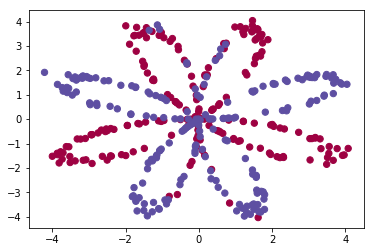

In [11]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T
    
    return X, Y

# Load the data
X, Y = load_planar_dataset();

print(Y.shape[1])

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

## 3.1 Two-layer neural network with 1-hidden layer of size = 1.

Reimplement the network from Section 2.1 here, train it and then display the results. 

epoch[0] = 0.09722797
epoch[10] = 0.09933488
epoch[20] = 0.09928951
epoch[30] = 0.09904475
epoch[40] = 0.09838809
epoch[50] = 0.09751927
epoch[60] = 0.09630379
epoch[70] = 0.09481450
epoch[80] = 0.09359717
epoch[90] = 0.09277349
epoch[100] = 0.09223319
epoch[110] = 0.09186186
epoch[120] = 0.09158884
epoch[130] = 0.09137574
epoch[140] = 0.09120187
epoch[150] = 0.09105557
epoch[160] = 0.09092979
epoch[170] = 0.09081994
epoch[180] = 0.09072283
epoch[190] = 0.09063611
epoch[200] = 0.09055801
epoch[210] = 0.09048717
epoch[220] = 0.09042249
epoch[230] = 0.09036310
epoch[240] = 0.09030827
epoch[250] = 0.09025743
epoch[260] = 0.09021008
epoch[270] = 0.09016581
epoch[280] = 0.09012429
epoch[290] = 0.09008522


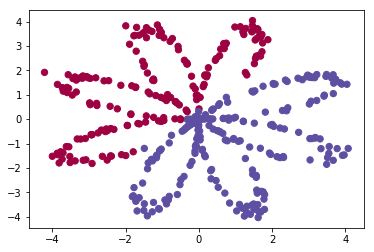

In [17]:
X = X.T
Y = Y.T

hidden_state_size = 1
input_dim = X.shape[1]
output_dim = Y.shape[1]

# Define the 2-layer network here (fill in yout code)
model = {}
model['hidden-linear'] = nn_Linear(input_dim, hidden_state_size)
model['hidden-sigmoid'] = nn_Sigmoid()
model['linear'] = nn_Linear(hidden_state_size, output_dim)
model['sigmoid'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()


# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.01
numberEpochs = 300

for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size):
        xi = X[i:i+1, :]
        yi = Y[i:i+1, :]

        # Forward pass (fill in your code)
        a0 = model['hidden-linear'].forward(xi)
        a1 = model['hidden-sigmoid'].forward(a0)
        a2 = model['linear'].forward(a1)
        a3 = model['sigmoid'].forward(a2)
        loss += model['loss'].forward(a3, yi)

        # Backward pass (fill in your code)
        da3 = model['loss'].backward(a3, yi)
        da2 = model['sigmoid'].backward(a2, da3)
        da1 = model['linear'].backward(a1, da2)
        da0 = model['hidden-sigmoid'].backward(a0, da1)
        model['hidden-linear'].backward(xi, da0)

        # Update gradients (fill in your code)
        model['linear'].weight = model['linear'].weight - learningRate * model['linear'].gradWeight
        model['linear'].bias = model['linear'].bias - learningRate * model['linear'].gradBias
        model['hidden-linear'].weight = model['hidden-linear'].weight - learningRate * model['hidden-linear'].gradWeight
        model['hidden-linear'].bias = model['hidden-linear'].bias - learningRate * model['hidden-linear'].gradBias

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

classEstimate = np.zeros((400,1), dtype='uint8')

y_hat = np.array(Y.shape[1])

for i in range(0, 400):
    # Forward pass (fill in your code)
    xi = X[i:i+1, :]
    a0 = model['hidden-linear'].forward(xi)
    a1 = model['hidden-sigmoid'].forward(a0)
    a2 = model['linear'].forward(a1)
    y_hat = model['sigmoid'].forward(a2).item(0)

    classEstimate[i,0] = (y_hat > 0.5)

X = X.T
Y = Y.T

plt.scatter(X[0, :], X[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral)

## 3.2 Two-layer neural network with 1-hidden layer of size = 5.

Redo the experiment with the hidden layer of size 5 and visualize the result. <b>Describe in a separate cell of the notebook what is different between the two runs </b>. What behaviout did network with largerr hidden state exhibit that the one with smaller one did not? Why? 

epoch[0] = 0.09244584
epoch[10] = 0.09783628
epoch[20] = 0.09776673
epoch[30] = 0.09735380
epoch[40] = 0.09607412
epoch[50] = 0.09495322
epoch[60] = 0.09453940
epoch[70] = 0.09405740
epoch[80] = 0.09299239
epoch[90] = 0.09116585
epoch[100] = 0.08911266
epoch[110] = 0.08744687
epoch[120] = 0.08629811
epoch[130] = 0.08552847
epoch[140] = 0.08494714
epoch[150] = 0.08428631
epoch[160] = 0.08279719
epoch[170] = 0.07868816
epoch[180] = 0.07221794
epoch[190] = 0.06603896
epoch[200] = 0.06110172
epoch[210] = 0.05733604
epoch[220] = 0.05451424
epoch[230] = 0.05239091
epoch[240] = 0.05076340
epoch[250] = 0.04948636
epoch[260] = 0.04846053
epoch[270] = 0.04761845
epoch[280] = 0.04691374
epoch[290] = 0.04631397


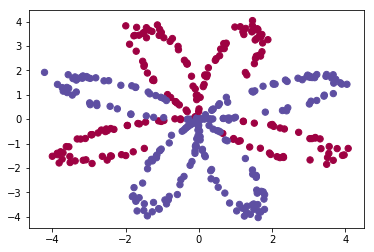

In [18]:
X = X.T
Y = Y.T

hidden_state_size = 5
input_dim = X.shape[1]
output_dim = Y.shape[1]

# Define the 2-layer network here (fill in yout code)
model = {}
model['hidden-linear'] = nn_Linear(input_dim, hidden_state_size)
model['hidden-sigmoid'] = nn_Sigmoid()
model['linear'] = nn_Linear(hidden_state_size, output_dim)
model['sigmoid'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()


# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.01
numberEpochs = 300

for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size):
        xi = X[i:i+1, :]
        yi = Y[i:i+1, :]

        # Forward pass (fill in your code)
        a0 = model['hidden-linear'].forward(xi)
        a1 = model['hidden-sigmoid'].forward(a0)
        a2 = model['linear'].forward(a1)
        a3 = model['sigmoid'].forward(a2)
        loss += model['loss'].forward(a3, yi)

        # Backward pass (fill in your code)
        da3 = model['loss'].backward(a3, yi)
        da2 = model['sigmoid'].backward(a2, da3)
        da1 = model['linear'].backward(a1, da2)
        da0 = model['hidden-sigmoid'].backward(a0, da1)
        model['hidden-linear'].backward(xi, da0)

        # Update gradients (fill in your code)
        model['linear'].weight = model['linear'].weight - learningRate * model['linear'].gradWeight
        model['linear'].bias = model['linear'].bias - learningRate * model['linear'].gradBias
        model['hidden-linear'].weight = model['hidden-linear'].weight - learningRate * model['hidden-linear'].gradWeight
        model['hidden-linear'].bias = model['hidden-linear'].bias - learningRate * model['hidden-linear'].gradBias

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

classEstimate = np.zeros((400,1), dtype='uint8')

y_hat = np.array(Y.shape[1])

for i in range(0, 400):
    # Forward pass (fill in your code)
    xi = X[i:i+1, :]
    a0 = model['hidden-linear'].forward(xi)
    a1 = model['hidden-sigmoid'].forward(a0)
    a2 = model['linear'].forward(a1)
    y_hat = model['sigmoid'].forward(a2).item(0)

    classEstimate[i,0] = (y_hat > 0.5)

X = X.T
Y = Y.T

plt.scatter(X[0, :], X[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral)

With a hidden layer of size 5 we get a better error value. This is due to having more neurons that better approximate the true data.

<div style="font-size:0.8em;color:#888;text-align:center;padding-top:20px;">If you find any errors or have questions about the assignment please contact instructor at lsigal@cs.ubc.ca or post the question on Piazza. 